# Import

In [1]:
import os
import librosa 
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import tensorflow as tf

from tqdm import tqdm
from scipy.io import wavfile as wav

2023-01-20 10:28:49.940212: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-20 10:28:50.059734: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-20 10:28:50.650739: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.3/lib64
2023-01-20 10:28:50.650809: W tensorflow/compiler/xla/strea

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


2023-01-20 10:29:23.128726: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-20 10:29:23.133664: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-20 10:29:23.134272: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-20 10:29:23.135358: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

## 예시

In [3]:
sound_no = './record_yes_no/1.아니요_18.wav'

In [158]:
example_list = [sound_no]
sample_rate  = 16000

In [5]:
def draw_sound(filename):
    plt.figure(figsize = (12, 4))
    data, librosa_sample_rate  = librosa.load(filename)
    plt.title('sound_bad_1.wav')
    librosa.display.waveshow(data, sr = 16000)

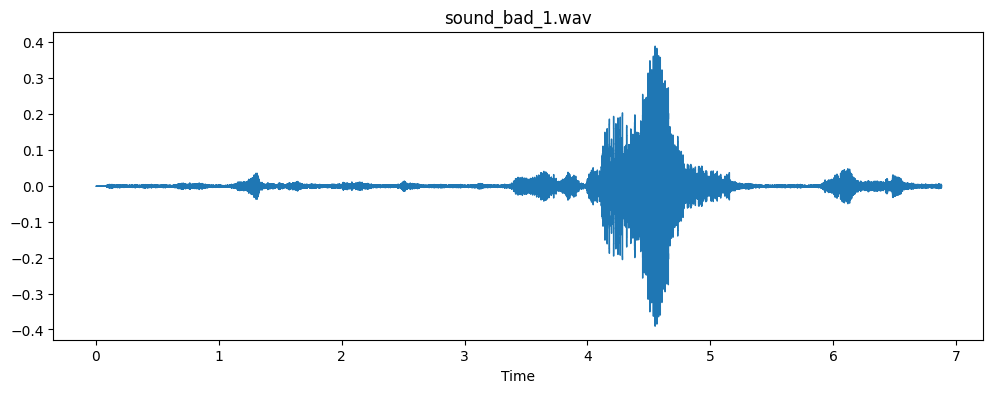

In [6]:
for i in  example_list:
    draw_sound(i)

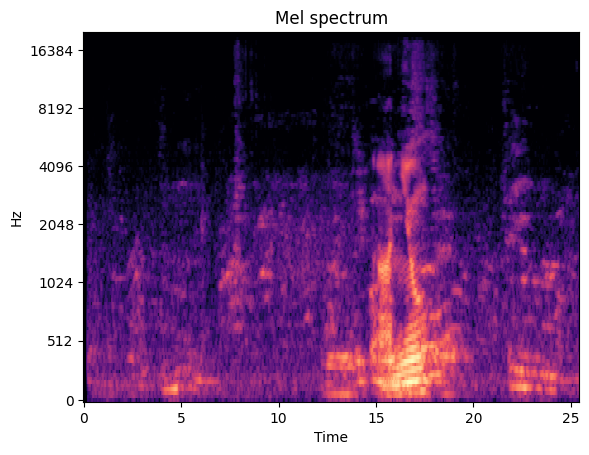

In [7]:
# melspectrogram
y, sr = librosa.load(sound_no)
yt, _ = librosa.effects.trim(y)
y = yt
plt.title('Mel spectrum')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=1024, hop_length=100)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time')

In [12]:
# mfcc

filename = sound_no 

librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename) 
print(librosa_audio.shape)
print(scipy_audio.shape)
print('Original sample rate:', scipy_sample_rate) 
print('Librosa sample rate:', librosa_sample_rate) 

mfccs = librosa.feature.mfcc(y = librosa_audio, sr = sample_rate, n_mfcc = 40)
print(mfccs.shape)

(110016,)
(220032, 2)
Original sample rate: 44100
Librosa sample rate: 22050
(40, 215)


Text(0, 0.5, 'MFCC coeff')

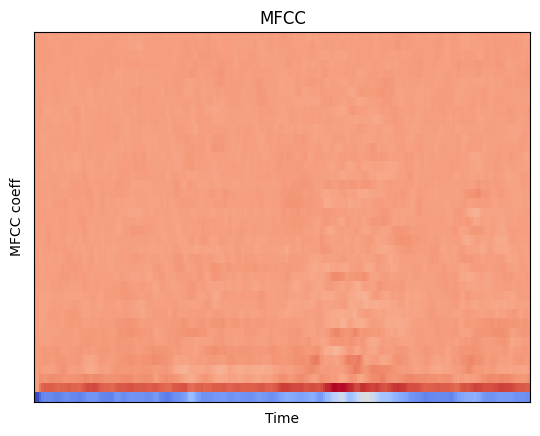

In [13]:
plt.title('MFCC')
librosa.display.specshow(mfccs, sr=sample_rate)
plt.xlabel('Time')
plt.ylabel('MFCC coeff')

In [14]:
train_path = os.listdir('./record_yes_no/')
train_path

['1.아니요_19.wav',
 '1.네_33.wav',
 '1.아니요_준석형_3.wav',
 '1.아니요_32.wav',
 '1.아니요_16.wav',
 '1.네_27.wav',
 '1.네_79.wav',
 '1.네_57.wav',
 '1.네_42.wav',
 '1.네_61.wav',
 '1.네_62.wav',
 '1.네_11.wav',
 '1.네_12.wav',
 '1.네_13.wav',
 '1.네_59.wav',
 '1.네_26.wav',
 '1.아니요_30.wav',
 '1.네_77.wav',
 '1.네_55.wav',
 '1.네_4.wav',
 '1.네_48.wav',
 '1.네_28.wav',
 '1.아니요_7.wav',
 '1.네_84.wav',
 '1.아니요_35.wav',
 '1.네_22.wav',
 '1.네_49.wav',
 '1.네_43.wav',
 '1.아니요_경환님_1.wav',
 '1.네_9.wav',
 '1.아니요_12.wav',
 '1.아니요_24.wav',
 '1.아니요_준석형_1.wav',
 '1.네_7.wav',
 '1.네_45.wav',
 '1.아니요_27.wav',
 '1.네_69.wav',
 '1.네_19.wav',
 '1.네_50.wav',
 '1.네_85.wav',
 '1.네_1.wav',
 '1.아니요_21.wav',
 '1.네_54.wav',
 '1.네_92.wav',
 '1.네_60.wav',
 '1.네_86.wav',
 '1.네_10.wav',
 '1.네_90.wav',
 '1.네_75.wav',
 '1.네_21.wav',
 '1.아니요_26.wav',
 '1.네_46.wav',
 '1.네_53.wav',
 '1.네_66.wav',
 '1.아니요_17.wav',
 '1.네_87.wav',
 '1.아니요_6.wav',
 '1.아니요_11.wav',
 '1.네_93.wav',
 '1.네_15.wav',
 '1.네_35.wav',
 '1.네_41.wav',
 '1.네_100.wav',
 '1.아니요_29.wav',


# 데이터

In [6]:
# wav_dict = {
#             '아' : 0,
#             '좋아요' : 1,
#             '안좋아요' : 2,
#             '힘들어' : 3,
#             '피곤해' : 4,
#             '별로야' : 5,
#             '하기싫다' : 6,
#             '좋아' : 7
#             }

In [205]:
wav_dict = {
            '아니요' : 0,
            '네' : 1
            }

In [149]:
# # Change audio names 'yes_1.wav' --> '1.yes_1.wav'
# import os
# for wav in os.listdir(f'../record_yes_no/'):
#     if '아니요' in wav:
#         os.rename(f'../record_yes_no/{wav}', '../record_yes_no/1.'+f'{wav}')

In [206]:
wav_files = []

for file in os.listdir(f'./record_yes_no/'):
    wav_files.append(f'./record_yes_no/{file}')
    
wav_df = pd.DataFrame({'path': wav_files})
wav_df['label'] = wav_df['path'].apply(lambda x: x.split('/')[-1])
wav_df['label'] = wav_df['label'].apply(lambda x: x.split('.')[1])
wav_df['label'] = wav_df['label'].apply(lambda x: x.split('_')[0])

wav_df

,path,label
0,./record_yes_no/2.기타_2.wav,기타
1,./record_yes_no/55.기타_55.wav,기타
2,./record_yes_no/114.기타_114.wav,기타
3,./record_yes_no/159.기타_159.wav,기타
4,./record_yes_no/71.기타_71.wav,기타
...,...,...
313,./record_yes_no/1.네_38.wav,네
314,./record_yes_no/1.네_81.wav,네
315,./record_yes_no/1.네_67.wav,네
316,./record_yes_no/1.네_6.wav,네


In [207]:
wav_df['label']

0      기타
1      기타
2      기타
3      기타
4      기타
       ..
313     네
314     네
315     네
316     네
317     네
Name: label, Length: 318, dtype: object

## 라벨로 변환

In [208]:
class_label = []

for label in wav_df['label']:
    if label in wav_dict:
        class_label.append(wav_dict[label])
        
wav_df['class_label'] = class_label
wav_df

,path,label,class_label
0,./record_yes_no/2.기타_2.wav,기타,2
1,./record_yes_no/55.기타_55.wav,기타,2
2,./record_yes_no/114.기타_114.wav,기타,2
3,./record_yes_no/159.기타_159.wav,기타,2
4,./record_yes_no/71.기타_71.wav,기타,2
...,...,...,...
313,./record_yes_no/1.네_38.wav,네,1
314,./record_yes_no/1.네_81.wav,네,1
315,./record_yes_no/1.네_67.wav,네,1
316,./record_yes_no/1.네_6.wav,네,1


In [209]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(wav_df,
                                        test_size=0.1,
                                        stratify=wav_df['class_label'],
                                        random_state=7)

In [210]:
train_data, val_data = train_test_split(train_data,
                                        test_size=0.2,
                                        stratify=train_data['class_label'],
                                        random_state=7)

In [211]:
len(train_data), len(val_data), len(test_data)

(228, 58, 32)

In [212]:
X_train = train_data['path']
y_train = train_data['class_label']

In [213]:
X_val = val_data['path']
y_val = val_data['class_label']

In [214]:
# Search the max_len of mfccs
n_mfcc = 40  # Initialize n_mfcc
shapes= []

for i in range(len(wav_df)):
    librosa_audio, librosa_sample_rate = librosa.load(wav_df.iloc[i, 0]) 
    mfccs = librosa.feature.mfcc(y=librosa_audio, sr=sample_rate, n_mfcc=n_mfcc)
    shapes.append(mfccs.shape[1])

print('max_len :', max(shapes))
print(sample_rate)
print(librosa_sample_rate)

max_len : 248
16000
22050


In [215]:
max_pad_len = max(shapes)

def extract_feature(file_name):
    print('file name :', file_name)
    try:
        audio, librosa_sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=16000, n_mfcc=n_mfcc)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0,0), (0, pad_width)), mode='constant')
        print(mfccs.shape)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        print(e);
        return None
    
#     return padded_mfccs
    return mfccs

In [216]:
features_train = []

for i, wav in enumerate(X_train):
    mfccs = extract_feature(wav)
    features_train.append([mfccs, y_train.values[i]])#, y_train[i]])

features_df = pd.DataFrame(features_train, columns=['feature', 'class_label'])

file name : ./record_yes_no/164.기타_164.wav
(40, 248)
file name : ./record_yes_no/134.기타_134.wav
(40, 248)
file name : ./record_yes_no/1.네_14.wav
(40, 248)
file name : ./record_yes_no/53.기타_53.wav
(40, 248)
file name : ./record_yes_no/1.네_87.wav
(40, 248)
file name : ./record_yes_no/34.기타_34.wav
(40, 248)
file name : ./record_yes_no/1.네_43.wav
(40, 248)
file name : ./record_yes_no/28.기타_28.wav
(40, 248)
file name : ./record_yes_no/1.아니요_2.wav
(40, 248)
file name : ./record_yes_no/73.기타_73.wav
(40, 248)
file name : ./record_yes_no/118.기타_118.wav
(40, 248)
file name : ./record_yes_no/1.네_5.wav
(40, 248)
file name : ./record_yes_no/94.기타_94.wav
(40, 248)
file name : ./record_yes_no/48.기타_48.wav
(40, 248)
file name : ./record_yes_no/1.네_19.wav
(40, 248)
file name : ./record_yes_no/1.네_95.wav
(40, 248)
file name : ./record_yes_no/1.아니요_24.wav
(40, 248)
file name : ./record_yes_no/29.기타_29.wav
(40, 248)
file name : ./record_yes_no/97.기타_97.wav
(40, 248)
file name : ./record_yes_no/1.네_53.wav


In [217]:
features_df

,feature,class_label
0,"[[-547.50574, -441.84207, -190.93074, -161.219...",2
1,"[[-600.4728, -550.89136, -540.62195, -533.3083...",2
2,"[[-622.2842, -622.2842, -621.32477, -520.0495,...",1
3,"[[-580.88745, -580.88745, -580.88745, -545.021...",2
4,"[[-527.5754, -527.5754, -502.58676, -441.8287,...",1
...,...,...
223,"[[-554.85144, -554.85144, -528.88934, -426.432...",2
224,"[[-556.18335, -543.3557, -488.25958, -480.7024...",2
225,"[[-514.6957, -447.3442, -439.5752, -452.12927,...",2
226,"[[-622.31, -609.211, -570.85266, -543.82935, -...",1


In [218]:
features_val = []

for i, wav in enumerate(X_val):
    mfccs = extract_feature(wav)
    features_val.append([mfccs, y_val.values[i]])#, y_val[i]])

features_val_df = pd.DataFrame(features_val, columns=['feature', 'class_label'])

file name : ./record_yes_no/166.기타_166.wav
(40, 248)
file name : ./record_yes_no/1.네_39.wav
(40, 248)
file name : ./record_yes_no/1.아니요_38.wav
(40, 248)
file name : ./record_yes_no/95.기타_95.wav
(40, 248)
file name : ./record_yes_no/1.네_47.wav
(40, 248)
file name : ./record_yes_no/1.네_88.wav
(40, 248)
file name : ./record_yes_no/1.네_90.wav
(40, 248)
file name : ./record_yes_no/119.기타_119.wav
(40, 248)
file name : ./record_yes_no/59.기타_59.wav
(40, 248)
file name : ./record_yes_no/25.기타_25.wav
(40, 248)
file name : ./record_yes_no/113.기타_113.wav
(40, 248)
file name : ./record_yes_no/82.기타_82.wav
(40, 248)
file name : ./record_yes_no/1.네_20.wav
(40, 248)
file name : ./record_yes_no/1.네_6.wav
(40, 248)
file name : ./record_yes_no/141.기타_141.wav
(40, 248)
file name : ./record_yes_no/144.기타_144.wav
(40, 248)
file name : ./record_yes_no/1.네_73.wav
(40, 248)
file name : ./record_yes_no/129.기타_129.wav
(40, 248)
file name : ./record_yes_no/1.아니요_17.wav
(40, 248)
file name : ./record_yes_no/57.기타_

In [219]:
features_val_df

,feature,class_label
0,"[[-523.81104, -467.26505, -454.14563, -449.683...",2
1,"[[-725.59753, -725.59753, -549.80255, -452.873...",1
2,"[[-661.116, -654.8664, -490.47012, -428.9897, ...",0
3,"[[-572.9501, -508.05777, -493.85013, -506.5376...",2
4,"[[-684.31744, -684.31744, -611.27014, -554.315...",1
5,"[[-578.9187, -578.9187, -545.51263, -505.10788...",1
6,"[[-593.2559, -593.2559, -591.8576, -547.64954,...",1
7,"[[-579.98486, -579.98486, -536.5527, -492.4356...",2
8,"[[-481.388, -406.206, -398.52734, -418.37744, ...",2
9,"[[-464.61783, -412.56866, -392.1986, -402.3216...",2


In [220]:
np.array(features_df.feature.tolist()).shape

(228, 40, 248)

In [221]:
X_train = np.array(features_df.feature.tolist())
y_train = np.array(features_df.class_label.tolist())

In [222]:
X_train.shape

(228, 40, 248)

In [223]:
X_val = np.array(features_val_df.feature.tolist())
y_val = np.array(features_val_df.class_label.tolist())

In [224]:
X_val.shape

(58, 40, 248)

In [225]:
num_rows = n_mfcc
# num_columns = max(shapes)
num_columns = max(shapes)
num_channels = 1

X_train = X_train.reshape(X_train.shape[0], num_rows, num_columns, num_channels)
X_val = X_val.reshape(X_val.shape[0], num_rows, num_columns, num_channels)

In [226]:
X_train.shape

(228, 40, 248, 1)

# 모델 생성

In [246]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

## 콜백

In [27]:
### ReduceLROnPlateau 콜백

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 2,
    verbose = 1,
    factor = 0.5,
    min_lr = 0.000000001
)

In [28]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5,
    verbose = 1,
    mode = 'max'
)

In [29]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    monitor = 'val_accuracy',
    filepath = 'mfcc_.{epoch:02d}-{val_accuracy:.6f}.hdf5',
    verbose = 1,
    save_best_only = True,
    save_weights_only = True
)

In [248]:
#CNN모델 구현
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, input_shape=(num_rows, num_columns, num_channels), 
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(len(wav_dict), activation = 'softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 40, 248, 32)       320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 20, 124, 32)      0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 20, 124, 32)       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 20, 124, 64)       18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 10, 62, 64)       0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 10, 62, 64)       

In [249]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

## 모델 훈련

In [250]:
history = model.fit(X_train,
                 y_train,
                 epochs=100,
                 verbose=1,
                 validation_data=(X_val, y_val)
                )#callbacks = [reduce_lr, early_stopping, checkpoint])

Epoch 1/100


2023-01-20 14:52:45.008222: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/dropout_26/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


8/8 [==============================] - 2s 35ms/step - loss: 11.5580 - accuracy: 0.6316 - val_loss: 0.3991 - val_accuracy: 0.8448
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 0.8346 - accuracy: 0.7807 - val_loss: 0.8442 - val_accuracy: 0.7586
Epoch 3/100
8/8 [==============================] - 0s 23ms/step - loss: 0.4256 - accuracy: 0.8158 - val_loss: 0.5269 - val_accuracy: 0.8448
Epoch 4/100
8/8 [==============================] - 0s 20ms/step - loss: 0.3709 - accuracy: 0.8202 - val_loss: 0.3255 - val_accuracy: 0.8793
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 0.3252 - accuracy: 0.8158 - val_loss: 0.3900 - val_accuracy: 0.8448
Epoch 6/100
8/8 [==============================] - 0s 22ms/step - loss: 0.3335 - accuracy: 0.8333 - val_loss: 0.4298 - val_accuracy: 0.8448
Epoch 7/100
8/8 [==============================] - 0s 20ms/step - loss: 0.2927 - accuracy: 0.8465 - val_loss: 0.3473 - val_accuracy: 0.8448
Epoch 8/100
8/8 [==============

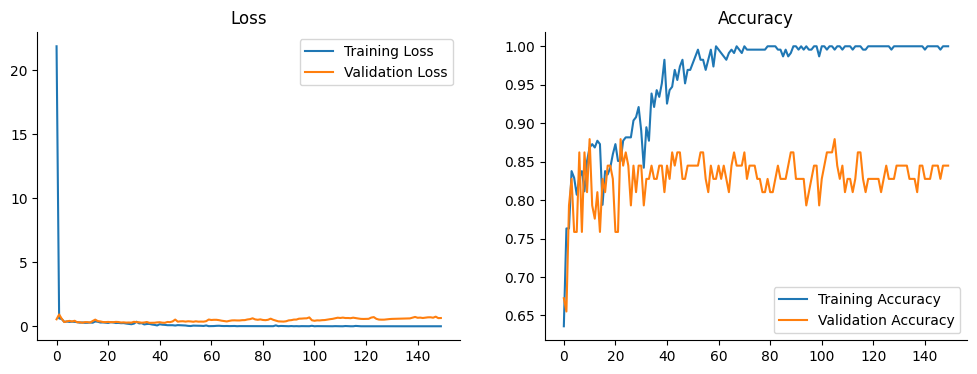

In [232]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.lineplot(x = range(len(history.history['loss'])),
             y = history.history['loss'], ax = axes[0],
             label = 'Training Loss')

sns.lineplot(x = range(len(history.history['loss'])),
             y = history.history['val_loss'], ax = axes[0],
             label = 'Validation Loss')

sns.lineplot(x = range(len(history.history['accuracy'])),
             y = history.history['accuracy'], ax = axes[1],
             label = 'Training Accuracy')

sns.lineplot(x = range(len(history.history['accuracy'])),
             y = history.history['val_accuracy'], ax = axes[1],
             label = 'Validation Accuracy')
axes[0].set_title('Loss')
axes[1].set_title('Accuracy')

sns.despine()
plt.show()

In [251]:
def predict_features(file_name, max_pad_len, n_mfcc):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=16000, n_mfcc=n_mfcc)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    mfccs = mfccs.reshape(1, n_mfcc, max_pad_len, 1)
    
    return mfccs

In [252]:
val_data

,path,label,class_label
224,./record_yes_no/166.기타_166.wav,기타,2
255,./record_yes_no/1.네_39.wav,네,1
241,./record_yes_no/1.아니요_38.wav,아니요,0
263,./record_yes_no/95.기타_95.wav,기타,2
279,./record_yes_no/1.네_47.wav,네,1
159,./record_yes_no/1.네_88.wav,네,1
118,./record_yes_no/1.네_90.wav,네,1
293,./record_yes_no/119.기타_119.wav,기타,2
105,./record_yes_no/59.기타_59.wav,기타,2
168,./record_yes_no/25.기타_25.wav,기타,2


In [253]:
test_data

,path,label,class_label
93,./record_yes_no/66.기타_66.wav,기타,2
145,./record_yes_no/123.기타_123.wav,기타,2
28,./record_yes_no/1.네_11.wav,네,1
223,./record_yes_no/1.네_82.wav,네,1
102,./record_yes_no/157.기타_157.wav,기타,2
32,./record_yes_no/1.네_59.wav,네,1
304,./record_yes_no/1.아니요_28.wav,아니요,0
171,./record_yes_no/1.아니요_동준님_3.wav,아니요,0
139,./record_yes_no/145.기타_145.wav,기타,2
196,./record_yes_no/9.기타_9.wav,기타,2


In [254]:
# Count wrong data in val_data
cnt = 0

for i, data in enumerate(val_data['path']):
    prediction = np.argmax(model.predict(predict_features(data, max(shapes), n_mfcc)))
    real = val_data.iloc[i, 2]
    print('predict :', prediction)
    print('real :', real)
    if prediction != real:
        cnt += 1

print('count :', cnt, '/', len(val_data))

1/1 [==============================] - 0s 74ms/step
predict : 2
real : 2
1/1 [==============================] - 0s 29ms/step
predict : 1
real : 1
1/1 [==============================] - 0s 22ms/step
predict : 1
real : 0
1/1 [==============================] - 0s 27ms/step
predict : 2
real : 2
1/1 [==============================] - 0s 25ms/step
predict : 1
real : 1
1/1 [==============================] - 0s 27ms/step
predict : 1
real : 1
1/1 [==============================] - 0s 27ms/step
predict : 1
real : 1
1/1 [==============================] - 0s 23ms/step
predict : 2
real : 2
1/1 [==============================] - 0s 28ms/step
predict : 2
real : 2
1/1 [==============================] - 0s 26ms/step
predict : 2
real : 2
1/1 [==============================] - 0s 26ms/step
predict : 2
real : 2
1/1 [==============================] - 0s 29ms/step
predict : 2
real : 2
1/1 [==============================] - 0s 21ms/step
predict : 0
real : 1
1/1 [==============================] - 0s 38ms/step

In [255]:
# Count wrong data in test_data
cnt = 0

for i, data in enumerate(test_data['path']):
    prediction = np.argmax(model.predict(predict_features(data, max(shapes), n_mfcc)))
    real = test_data.iloc[i, 2]
    print('predict :', prediction)
    print('real :', real)
    if prediction != real:
        cnt += 1

print('count :', cnt, '/', len(test_data))

1/1 [==============================] - 0s 30ms/step
predict : 2
real : 2
1/1 [==============================] - 0s 27ms/step
predict : 2
real : 2
1/1 [==============================] - 0s 27ms/step
predict : 1
real : 1
1/1 [==============================] - 0s 27ms/step
predict : 1
real : 1
1/1 [==============================] - 0s 21ms/step
predict : 2
real : 2
1/1 [==============================] - 0s 28ms/step
predict : 1
real : 1
1/1 [==============================] - 0s 20ms/step
predict : 0
real : 0
1/1 [==============================] - 0s 27ms/step
predict : 1
real : 0
1/1 [==============================] - 0s 30ms/step
predict : 2
real : 2
1/1 [==============================] - 0s 26ms/step
predict : 2
real : 2
1/1 [==============================] - 0s 23ms/step
predict : 2
real : 2
1/1 [==============================] - 0s 29ms/step
predict : 0
real : 0
1/1 [==============================] - 0s 18ms/step
predict : 2
real : 2
1/1 [==============================] - 0s 24ms/step

# 음성 인식

In [256]:
reverse_dict= dict(map(reversed, wav_dict.items()))

In [257]:
reverse_dict

{0: '아니요', 1: '네', 2: '기타'}

In [260]:
import librosa
import sounddevice as sd
import numpy as np

# Collect microphone audio for 5 seconds
fs = 16000  # Sample rate
duration = 5  # Seconds
recording = sd.rec(int(fs * duration), samplerate=fs, channels=1)
sd.wait()
print('recording...')
recording = recording.flatten()
print(recording.shape)
# Extract MFCCs from microphone recording
mfccs = librosa.feature.mfcc(y=recording, sr=sample_rate, n_mfcc=n_mfcc)
print(mfccs)
print(sample_rate)
print(mfccs.shape)
pad_width = max_pad_len - mfccs.shape[1]
print('pad_width', pad_width)
mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
mfccs = mfccs.reshape(1, n_mfcc, max_pad_len, 1)

# # Use MFCCs as input to your CNN model
prediction = model.predict(mfccs)
print(prediction)
print(reverse_dict[np.argmax(prediction)])

recording...
(80000,)
[[-272.30035    -265.79565    -280.88898    ... -295.57584
  -291.05774    -305.83325   ]
 [  98.24601      99.34206     108.27412    ...  117.80899
   115.59323     112.32556   ]
 [  13.7315445     7.393507      7.609635   ...    2.3767054
     2.0497403     6.8513455 ]
 ...
 [   3.1795378     2.6661835     3.0659857  ...    1.3992553
     2.203998      5.300072  ]
 [  -2.9018865    -4.2915998    -2.8103004  ...    5.0434837
     4.287222      1.8333769 ]
 [   4.974269      0.51860905   -0.96551085 ...    3.1548922
     0.42096624   -1.0716411 ]]
16000
(40, 157)
pad_width 91
1/1 [==============================] - 0s 28ms/step
[[0.00112546 0.0032372  0.99563736]]
기타


## pyaudio

In [266]:
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 16000

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("start recording...")

frames = []
seconds = 5

for i in range(0, int(RATE / CHUNK*seconds)):
    data = stream.read(CHUNK)
    frames.append(data)

print('recording stopped')

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open("./output.wav", "wb")
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

mic_audio, mic_sample_rate = librosa.load("./output.wav")
librosa_sample_rate= 16000
mfccs = librosa.feature.mfcc(y = mic_audio, sr = librosa_sample_rate, n_mfcc = n_mfcc)
pad_width = max_pad_len - mfccs.shape[1]
print('pad_width', pad_width)
mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
mfccs = mfccs.reshape(1, n_mfcc, max_pad_len, 1)
print(mfccs)
print(librosa_sample_rate)
print(mfccs.shape)

# # Use MFCCs as input to your CNN model
prediction = model.predict(mfccs)
print(prediction)
print(reverse_dict[np.argmax(prediction)])

start recording...
recording stopped
pad_width 33
[[[[-229.98582   ]
   [-189.0827    ]
   [-150.67957   ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  [[ 157.1995    ]
   [ 152.2267    ]
   [ 134.46884   ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  [[  -8.680298  ]
   [ -30.426613  ]
   [ -54.145546  ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  ...

  [[   2.1108527 ]
   [   4.6290765 ]
   [   6.09486   ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  [[   0.23369247]
   [  -1.4685197 ]
   [  -0.8192745 ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]

  [[  -3.3571851 ]
   [   1.3759826 ]
   [   6.495598  ]
   ...
   [   0.        ]
   [   0.        ]
   [   0.        ]]]]
16000
(1, 40, 248, 1)
1/1 [==============================] - 0s 21ms/step
[[0.78679144 0.17144915 0.0417594 ]]
아니요


In [57]:
y, sr = librosa.load(librosa.ex('libri1'))

In [58]:
mfcc1 = librosa.feature.mfcc(y=y, sr=16000)
mfcc1.shape

(20, 640)

In [59]:
mfcc2 = librosa.feature.mfcc(y=y, sr=16000, hop_length=1024, htk=True)
mfcc2.shape

(20, 320)

In [62]:
mfccs4 = librosa.feature.mfcc(y=y, sr=16000, n_mfcc=40)
mfccs4.shape

(40, 640)